# 실습2 - 뉴스기사 요약하여 정리하기

In [2]:
import pandas as pd
import os
os.chdir(r"C:\Users\진현영\Desktop\패스트캠퍼스\데이터전처리\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터")

In [3]:
df = pd.read_csv("금융기사목록.csv", engine="python")
df.head()

,기사제목,신문사,작성일자
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01
1,코스피 상단 28003100,서울경제,2018-01-01
2,한숨 동부대우전자 중동,서울경제,2018-01-01
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01


In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 30
plt.rcParams["figure.figsize"] = (30, 10)

## 월별 뉴스 기사 수 추이 시각화

<BarContainer object of 12 artists>

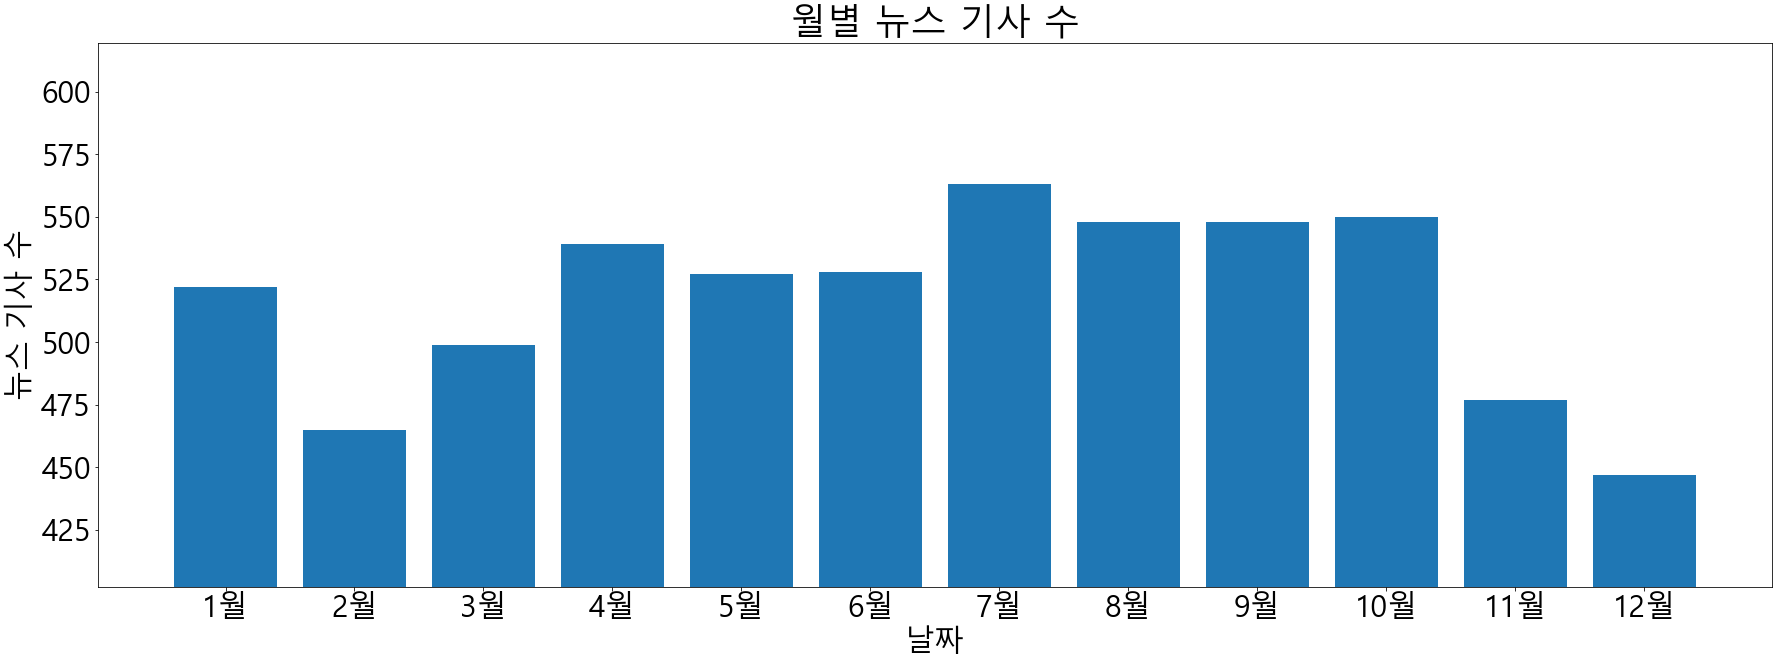

In [9]:
# 일단은 '월' 컬럼을 int type으로 바꾸지는 않음.
df['월'] = df['작성일자'].str.split('-', expand=True).iloc[:,1]
grouped_df = df.groupby(['월'], as_index = False)['작성일자'].count()
plt.title("월별 뉴스 기사 수")
plt.xlabel("날짜")
plt.ylabel("뉴스 기사 수")
plt.xticks(range(12), [str(i+1)+'월' for i in range(12)])
plt.ylim([min(grouped_df['작성일자']) * 0.9,
          max(grouped_df['작성일자'] * 1.1)]) # 효율적 시각화를 위해 범위조정

plt.bar(grouped_df['월'], grouped_df['작성일자'])

## 주요 단어 추출

In [10]:
df['기사제목'].head()

0                       휴장일 슬쩍올빼미 공시 주의보
1                        코스피 상단 28003100
2                           한숨 동부대우전자 중동
3    금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다
4         금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속
Name: 기사제목, dtype: object

In [14]:
# 반환된 list들을 sum으로 하나로 이어붙임
df['기사제목'].str.split(' ', expand=False).sum()[:10]

['휴장일', '슬쩍올빼미', '공시', '주의보', '코스피', '상단', '28003100', '한숨', '동부대우전자', '중동']

In [15]:
# 공백으로 단어분리
word_list = df['기사제목'].str.split(' ' ,expand=False).sum()
# Series에 value_counts()함수가 있으므로 변환
word_list = pd.Series(word_list)
# 빈도가 높은 상위 10개 출력
word_list.value_counts().iloc[:10]

코스피     815
증시      745
상승      390
하락      350
코스닥     252
美       224
우려      215
마켓뷰     205
오전시황    190
환율      184
dtype: int64

In [16]:
# 10위권 밖은 기타 리스트로 정의
other_occur = word_list.value_counts().iloc[11:].sum()
# 10위권까지는 메이저 리스트로 정의
major_word_list = word_list.value_counts().iloc[:10]
major_word_list['기타'] = other_occur

([<matplotlib.patches.Wedge at 0x2637b0114c8>,
 [Text(-0.7557875035693594, 0.26226942148942095, '기타'),
  Text(0.7557875097082181, -0.2622694037989376, '주요단어')],
 [Text(-0.5668406276770195, 0.19670206611706567, '89.4%'),
  Text(0.5668406322811635, -0.19670205284920317, '10.6%')])

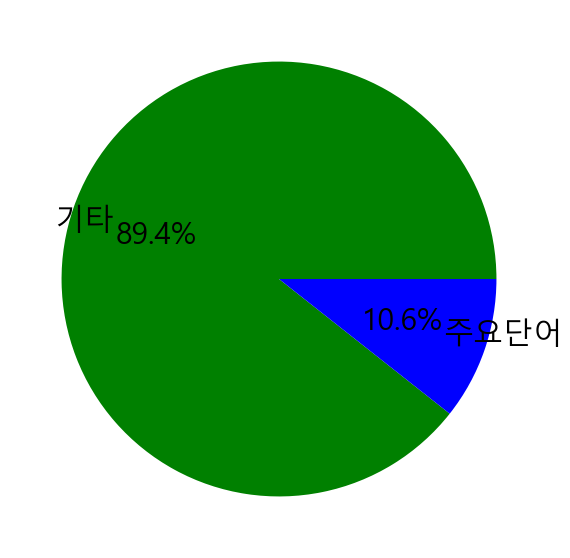

In [17]:
# 주요 단어 비율 시각화
plt.rcParams["figure.figsize"] = (10, 10)
plt.pie(x = [major_word_list['기타'], major_word_list.iloc[:-1].sum()], # X는 10위권데이터, Y는 기타
        labels = ['기타', '주요단어'],
        colors = ['green', 'blue'],
        labeldistance = 0.8,
        autopct = '%1.1f%%')

## 월별 주요 단어 출현 빈도 시각화

In [18]:
major_word_list = major_word_list.iloc[:-1] # 기타 제외

In [19]:
new_cols = []
for col in major_word_list.index:
    df[col + "_등장횟수"] = df['기사제목'].str.contains(col) # 새로운 컬럼 추가
    new_cols.append(col + "_등장횟수")
    
df.head()

# 참고 : sklearn.countvectorizer => 단어 문서 행렬

,기사제목,신문사,작성일자,월,코스피_등장횟수,증시_등장횟수,상승_등장횟수,하락_등장횟수,코스닥_등장횟수,美_등장횟수,우려_등장횟수,마켓뷰_등장횟수,오전시황_등장횟수,환율_등장횟수
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01,01,False,False,False,False,False,False,False,False,False,False
1,코스피 상단 28003100,서울경제,2018-01-01,01,True,False,False,False,False,False,False,False,False,False
2,한숨 동부대우전자 중동,서울경제,2018-01-01,01,False,False,False,False,False,False,False,False,False,False
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01,01,False,False,False,False,False,False,False,False,False,False
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01,01,False,False,False,False,False,False,False,False,False,False


In [21]:
grouped_df = df.groupby('월',as_index = False)[new_cols].sum()
grouped_df

,월,코스피_등장횟수,증시_등장횟수,상승_등장횟수,하락_등장횟수,코스닥_등장횟수,美_등장횟수,우려_등장횟수,마켓뷰_등장횟수,오전시황_등장횟수,환율_등장횟수
0,01,112.0,81.0,67.0,43.0,154.0,29.0,6.0,20.0,19.0,34.0
1,02,100.0,136.0,74.0,38.0,50.0,72.0,16.0,18.0,14.0,22.0
2,03,138.0,104.0,48.0,43.0,38.0,90.0,54.0,23.0,20.0,16.0
3,04,152.0,106.0,68.0,55.0,48.0,61.0,25.0,13.0,22.0,30.0
4,05,106.0,113.0,62.0,67.0,38.0,35.0,22.0,12.0,13.0,19.0
5,06,80.0,154.0,54.0,54.0,19.0,40.0,23.0,17.0,5.0,25.0
6,07,90.0,126.0,52.0,49.0,54.0,42.0,24.0,20.0,16.0,30.0
7,08,96.0,113.0,47.0,35.0,24.0,51.0,15.0,22.0,22.0,24.0
8,09,65.0,97.0,35.0,37.0,30.0,59.0,25.0,16.0,13.0,13.0
9,10,119.0,172.0,45.0,56.0,30.0,59.0,19.0,12.0,15.0,31.0
